Βαρδής Γεωργίλας - 3210027

# Β2

In [2]:
!pip install -U datasets fsspec bitsandbytes


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Load Dataset

In [1]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

# Φόρτωση του dataset
ds = load_dataset("DominusTea/GreekLegalSum")
df = pd.DataFrame(ds['train'])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/153 [00:00<?, ?B/s]

hugginface_dataset.csv:   0%|          | 0.00/289M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8395 [00:00<?, ? examples/s]

### Γράφημα Συχνότητας Θεματικών Κατηγοριών

Το παρακάτω γράφημα παρουσιάζει τις 20 πιο συχνές τιμές της στήλης case_category, η οποία αντιπροσωπεύει τη θεματική κατηγορία κάθε υπόθεσης. Ο σκοπός είναι να δοθεί μια γενική εικόνα για το ποιες θεματικές εμφανίζονται συχνότερα στο σύνολο των δεδομένων.


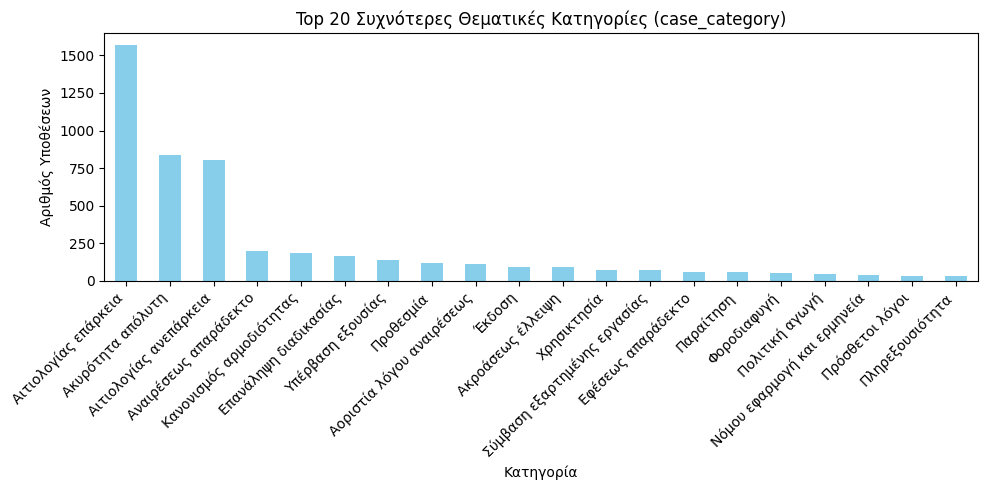

In [ ]:
category_counts = df['case_category'].value_counts()

# κράτα μόνο τις 20 πιο συχνές κατηγορίες
top_categories = category_counts.head(20)

top_categories.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title("Top 20 Συχνότερες Θεματικές Κατηγορίες (case_category)")
plt.xlabel("Κατηγορία")
plt.ylabel("Αριθμός Υποθέσεων")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



### Γράφημα Συχνότητας των Θεματικών Tags

Το παρακάτω γράφημα απεικονίζει τα 20 συχνότερα θεματικά *tags* από τη στήλη case_tags του συνόλου δεδομένων. Αρχικά, αφαιρούνται τα κενά ή μη διαθέσιμα πεδία και τα *tags* χωρίζονται σε επιμέρους λέξεις-κλειδιά. Στη συνέχεια μετριέται η συχνότητα εμφάνισής τους και εμφανίζεται με τη μορφή ραβδογραφήματος. Αυτό επιτρέπει την αναγνώριση των πιο δημοφιλών θεμάτων που χαρακτηρίζουν τις υποθέσεις.


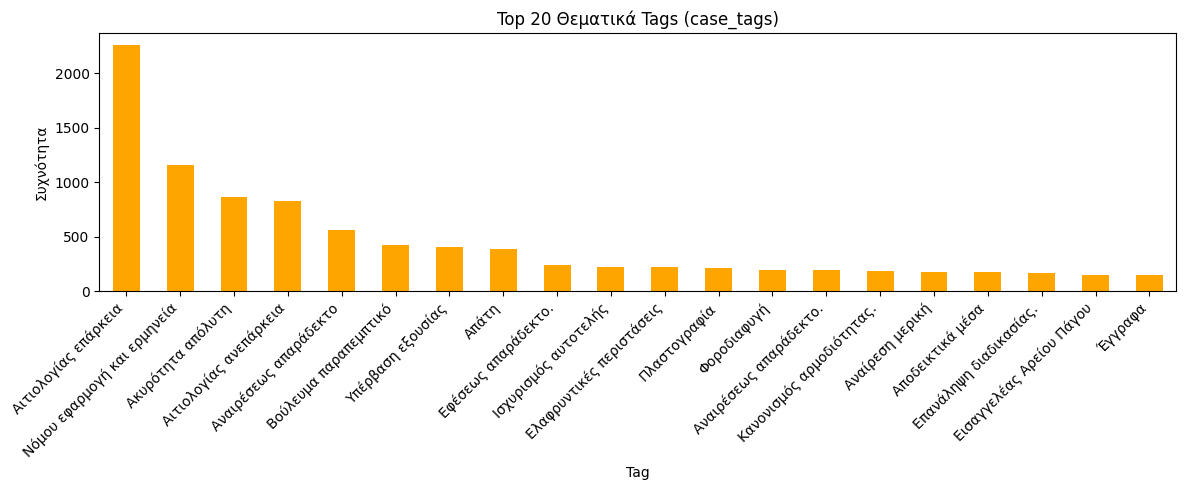

In [ ]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# αφαίρεση None/κενών
clean_tags = df['case_tags'].dropna()
clean_tags = clean_tags[clean_tags.str.strip() != ""]

# συνένωση όλων σε λίστα
all_tags = []
for tag_string in clean_tags:
    tags = [t.strip() for t in tag_string.split(',')]
    all_tags.extend(tags)

tag_counts = pd.Series(Counter(all_tags)).sort_values(ascending=False)

tag_counts.head(20).plot(kind='bar', figsize=(12, 5), color='orange')
plt.title("Top 20 Θεματικά Tags (case_tags)")
plt.xlabel("Tag")
plt.ylabel("Συχνότητα")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



### Συμπεράσματα

* Βάσει των διαγραμμάτων, οι πιο συχνές θεματικές ετικέτες (case_tags) σχετίζονται κυρίως με δικονομικά ζητήματα, όπως η «Αιτιολογίας επάρκεια», η «Ακυρότητα απόλυτη» και η «Ερμηνεία του Νόμου». Οι ετικέτες αυτές δείχνουν ότι η ελληνική νομολογία εστιάζει στην ορθότητα και πληρότητα των αποφάσεων, καθώς και στην τήρηση της δικονομικής τάξης. Πολλές ακόμη ετικέτες, όπως «Αναφέρετες απαράδεκτο» και «Υπέρβαση εξουσίας», ενισχύουν αυτή την παρατήρηση. Επιπλέον, παρατηρούνται tags που σχετίζονται με ποινικά αδικήματα (π.χ. απάτη, πλαστογραφία, φοροδιαφυγή), υποδεικνύοντας την παρουσία μικτού περιεχομένου στις υποθέσεις.

* Αντίστοιχα, στις θεματικές κατηγορίες (case_category), παρατηρείται σημαντική επικάλυψη με τα πιο δημοφιλή tags, με κορυφαία την «Αιτιολογίας επάρκεια». Η κατανομή είναι έντονα ανισομερής, καθώς λίγες κατηγορίες συγκεντρώνουν το μεγαλύτερο ποσοστό των υποθέσεων. Αυτό υποδεικνύει μια περιορισμένη αλλά κρίσιμη θεματική ποικιλία, η θεματολογία επικεντρώνεται κυρίως σε ζητήματα που αφορούν την εγκυρότητα της διαδικασίας και τη νομική τεκμηρίωση των αποφάσεων.

### Μετατροπή Κειμένων σε Διανύσματα με TF-IDF

Τα κείμενα των υποθέσεων μετατρέπονται σε αριθμητική μορφή χρησιμοποιώντας τη μέθοδο TF-IDF.

Η τεχνική αυτή αναθέτει βάρη στις λέξεις με βάση πόσες φορές εμφανίζεται μια λέξη σε ένα έγγραφο και πόσο σπάνια είναι η λέξη σε όλα τα έγγραφα.


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorization of text
vectorizer = TfidfVectorizer(max_features=5000)
texts_clean = df.loc[df['text'].notnull() & df['case_category'].notnull() & df['case_tags'].notnull()]
X = vectorizer.fit_transform(texts_clean['text'])

### Αξιολόγηση Αριθμού Συμπλεγμάτων (Clusters) με KMeans

Εφαρμόζουμε τον αλγόριθμο *KMeans* για ομαδοποίηση περιλήψεων με βάση την αναπαράστασή τους μέσω TF-IDF. Για διάφορες τιμές του k, αξιολογούμε την ποιότητα των αποτελεσμάτων με δύο μετρικές:

- **Silhouette Score**: Μετρά πόσο καλά ξεχωρίζουν τα clusters μεταξύ τους. Όσο πιο κοντά στο 1, τόσο καλύτερα διαχωρισμένα είναι.
- **Normalized Mutual Information (NMI)**: Συγκρίνει τα παραγόμενα clusters με τις πραγματικές κατηγορίες, case_category, και μετρά τον βαθμό συμφωνίας. Τιμές κοντά στο 1 δείχνουν υψηλή συμφωνία.

Τα αποτελέσματα απεικονίζονται σε τρία γραφήματα, επιτρέποντας την επιλογή της βέλτιστης τιμής του k βάση της συμπεριφοράς των μετρικών.


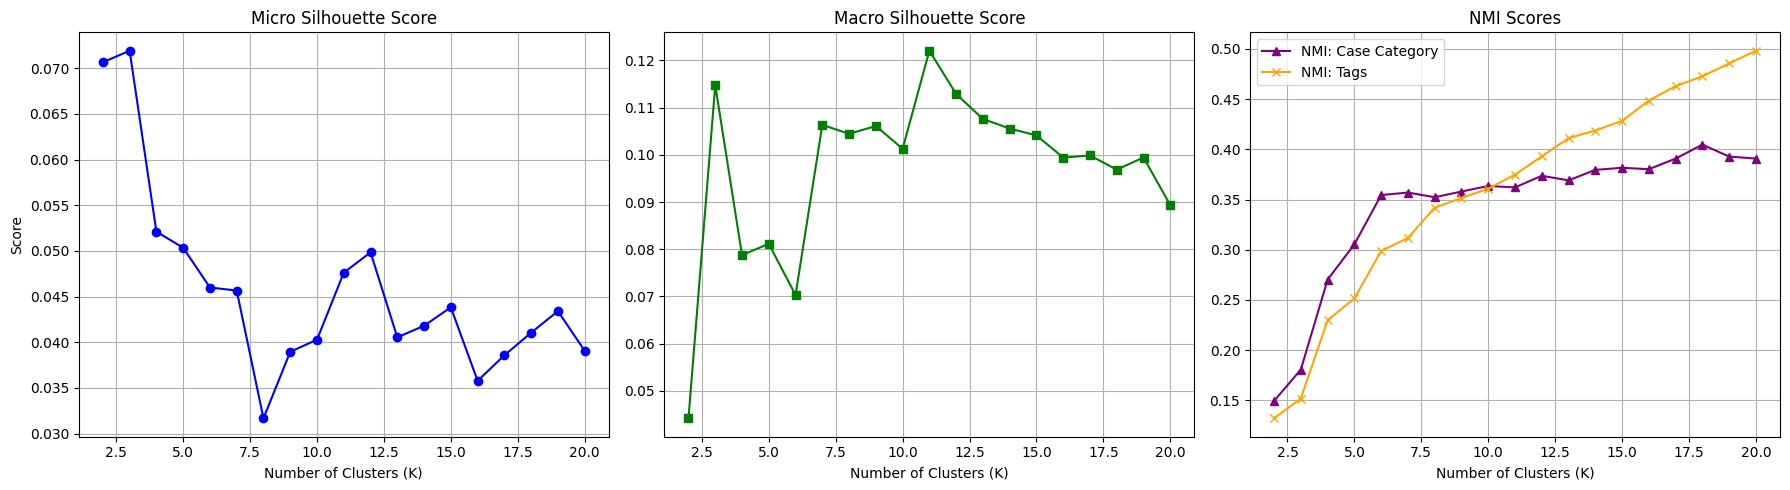

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples, normalized_mutual_info_score
import numpy as np
import matplotlib.pyplot as plt


true_case_category = texts_clean['case_category'].tolist()
true_tags = texts_clean['case_tags'].tolist()

K_range = range(2, 21)

silhouette_scores_micro = []
silhouette_scores_macro = []
nmi_case_category = []
nmi_tags = []

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    clusters = kmeans.fit_predict(X)

    # Micro
    sil_micro = silhouette_score(X, clusters)
    silhouette_scores_micro.append(sil_micro)

    # Macro
    sil_samples = silhouette_samples(X, clusters)
    sil_macro = np.mean([
        np.mean(sil_samples[clusters == label])
        for label in np.unique(clusters)
    ])
    silhouette_scores_macro.append(sil_macro)

    # NMI
    nmi_case = normalized_mutual_info_score(true_case_category, clusters)
    nmi_tag = normalized_mutual_info_score(true_tags, clusters)
    nmi_case_category.append(nmi_case)
    nmi_tags.append(nmi_tag)

fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharex=True)

# silhouette Micro
axs[0].plot(K_range, silhouette_scores_micro, marker='o', color='blue')
axs[0].set_title('Micro Silhouette Score')
axs[0].set_xlabel('Number of Clusters (K)')
axs[0].set_ylabel('Score')
axs[0].grid(True)

# silhouette Macro
axs[1].plot(K_range, silhouette_scores_macro, marker='s', color='green')
axs[1].set_title('Macro Silhouette Score')
axs[1].set_xlabel('Number of Clusters (K)')
axs[1].grid(True)

# NMI
axs[2].plot(K_range, nmi_case_category, marker='^', label='NMI: Case Category', color='purple')
axs[2].plot(K_range, nmi_tags, marker='x', label='NMI: Tags', color='orange')
axs[2].set_title('NMI Scores')
axs[2].set_xlabel('Number of Clusters (K)')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


<h2>Κ = 11</h2>

* Για τον προσδιορισμό του βέλτιστου αριθμού clusters στο K-means, αναλύθηκαν οι Micro και Macro Silhouette Scores καθώς και οι NMI Scores για τις ετικέτες Case Category και Tags. Ο Micro Silhouette Score, που μετρά τη συνολική συνοχή των clusters, παρουσιάζει χαμηλές τιμές με μέγιστο στο K=3. Ο Macro Silhouette Score, που δίνει ισότιμη βαρύτητα σε κάθε cluster, κορυφώνεται στο K=11, υποδεικνύοντας την καλύτερη ποιότητα των clusters. Οι NMI Scores για Case Category και Tags βελτιώνονται όσο αυξάνεται το K, με σημαντικά κέρδη έως το K=11 και πιο αργή αύξηση μετά, δείχνοντας καλύτερη ευθυγράμμιση των clusters με τις πραγματικές ετικέτες μέχρι αυτό το σημείο. Συνολικά, το K=11 θεωρείται βέλτιστο γιατί ισορροπεί την ποιότητα των clusters, με μέγιστο Macro Silhouette, και την ευθυγράμμιση με τις ετικέτες, ενώ αποφεύγει την υπεραπλούστευση ή την υπερβολική πολυπλοκότητα και την κατακερματισμένη ομαδοποίηση που παρατηρείται για μεγαλύτερα K.


<h1>UMAP Οπτικοποίηση για K-Means Clustering με K=11</h1>


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


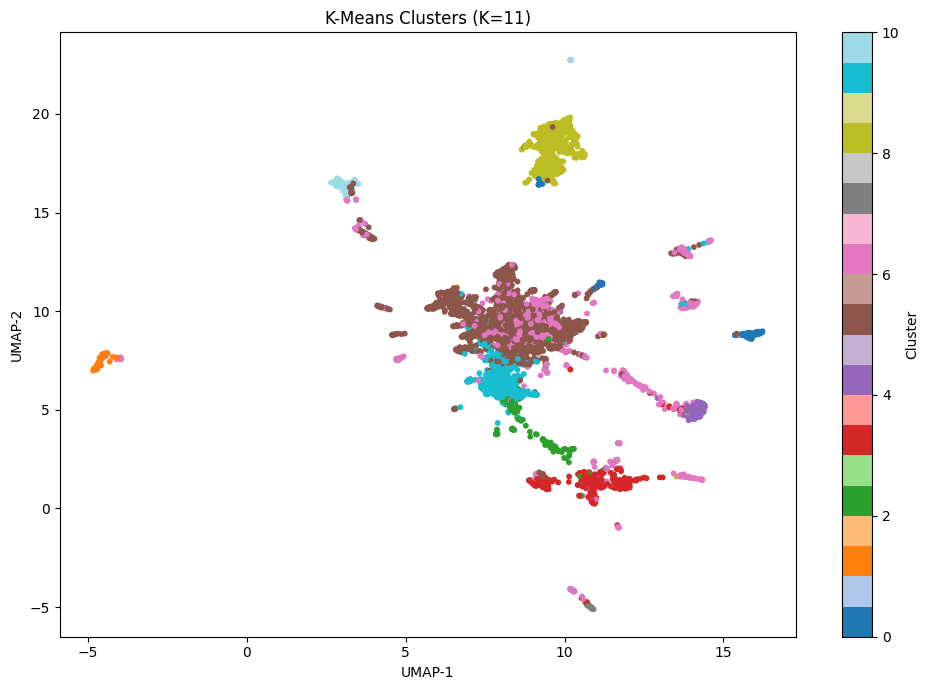

In [46]:
from sklearn.cluster import KMeans
import umap
import matplotlib.pyplot as plt


kmeans = KMeans(n_clusters=11, random_state=42)
clusters = kmeans.fit_predict(X)

# dimensionality reduction
reducer = umap.UMAP(random_state=42)
X_2d = reducer.fit_transform(X)

plt.figure(figsize=(10, 7))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=clusters, cmap='tab20', s=10)
plt.title("K-Means Clusters (K=11)")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()


## Εξαγωγή Τίτλων Συστάδων με LLM

In [11]:
# Reset indices for proper alignment
texts_clean = texts_clean.reset_index(drop=True)

# K-means and get clusters
kmeans = KMeans(n_clusters=11, random_state=42)
clusters = kmeans.fit_predict(X)

texts_clean['cluster'] = clusters


In [41]:
texts_clean.head(5)

,text,summary,case_category,case_tags,subset,cluster
0,ΑΡΙΘΜΟΣ 970/2009 \n\nΤΟ ΔΙΚΑΣΤΗΡΙΟ ΤΟΥ ΑΡΕΙΟΥ ...,Αίτηση αναίρεσης καταδικαστικής αποφάσεως για ...,Ακυρότητα απόλυτη,"Αιτιολογίας επάρκεια, Ακυρότητα απόλυτη, Απάτη...",0.0,9
1,Αριθμός 1692/2009 \n\nΤΟ ΔΙΚΑΣΤΗΡΙΟ ΤΟΥ ΑΡΕΙΟΥ...,Καθορισμός συνολικής ποινής (άρθρο 551 ΚΠΔ) με...,Ποινή συνολική,"Ποινή συνολική, Νόμου εφαρμογή και ερμηνεία, Ε...",0.0,6
2,Αριθμός 92/2013 \n\nΤΟ ΔΙΚΑΣΤΗΡΙΟ ΤΟΥ ΑΡΕΙΟΥ Π...,Καταδικαστική απόφαση για μη καταβολή χρεών πρ...,Ακυρότητα απόλυτη,"Ακυρότητα απόλυτη, Αοριστία λόγου αναιρέσεως, ...",0.0,5
3,Αριθμός 1502/2018 \n\nΤΟ ΔΙΚΑΣΤΗΡΙΟ ΤΟΥ ΑΡΕΙΟΥ...,Αναίρεση Εισαγγελέα Αρείου Πάγου κατά αθωωτική...,Αβάσιμοι λόγοι,"Αναιρέσεως απόρριψη, Εισαγγελέας Αρείου Πάγου,...",2.0,8
4,Αριθμός 1501/2018 \n\nΤΟ ΔΙΚΑΣΤΗΡΙΟ ΤΟΥ ΑΡΕΙΟΥ...,Κατ' εξακολούθηση απάτη κατ' επάγγελμα και κατ...,Αβάσιμοι λόγοι,"Ακυρότητα απόλυτη, Αναιρέσεως απόρριψη, Απάτη,...",1.0,9


### Loading Model

In [12]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

tokenizer = AutoTokenizer.from_pretrained("ilsp/Llama-Krikri-8B-Instruct")
model = AutoModelForCausalLM.from_pretrained(
    "ilsp/Llama-Krikri-8B-Instruct",
    device_map="auto",              # Βάζει το μοντέλο στη GPU
    load_in_4bit=True,
    torch_dtype=torch.bfloat16
)


tokenizer_config.json:   0%|          | 0.00/55.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/19.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/752 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/955 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.91G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.57G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/184 [00:00<?, ?B/s]

### Εξαγωγή Κύριου Θέματος από Ομαδοποιημένες Περιλήψεις Υποθέσεων


* Οι περιλήψεις έχουν ομαδοποιηθεί με τον αλγόριθμο **KMeans** σε 11 ομάδες.
* Για κάθε ομάδα επιλέγονται 3 περιλήψεις, είτε τυχαία, είτε ως οι πιο κοντινότερες στο κέντρο της ομάδας. Οι 3 περιλήψεις οργανόνωνται μαζί σε ένα κείμενο και ζητείται η διατύπωση του κεντρικού θέματος που τις ενώνει.
* Το θέμα εντοπίζεται αυτόματα μέσα στο κείμενο της απάντησης, με αναζήτηση της λέξης "Θέμα:".

Με αυτόν τον τρόπο αποκτάμαθι μια θεματική εικόνα για το περιεχόμενο κάθε ομάδας, με βάση τις ίδιες τις περιλήψεις των υποθέσεων.


In [34]:
import torch
import numpy as np
import re

# Υπολογισμός αποστάσεων από κεντροειδές
centroids = kmeans.cluster_centers_

def get_closest_to_centroid(cluster_data, cluster_id, X_subset):
    distances = np.linalg.norm(X_subset - centroids[cluster_id], axis=1)
    indices = np.argsort(distances)[:3]
    return cluster_data.iloc[indices]

# prompt 3-shot
def format_prompt(summaries):
    return f"""
Σου δίνονται τρία κείμενα νομικών αποφάσεων. Ποιο είναι το κεντρικό θέμα των αποφάσεων;
Απάντησε στην μορφή: Θέμα:…
Τα κείμενα είναι αυτά:
1. {summaries[0]}
2. {summaries[1]}
3. {summaries[2]}
"""
optimal_k=11

themes_random = {}
themes_centroid = {}

for cluster_id in range(optimal_k):
    cluster_data = texts_clean[texts_clean['cluster'] == cluster_id]

    texts_clean = texts_clean.loc[df['summary'].notnull() & texts_clean['case_category'].notnull()]

    condition = (texts_clean['cluster'] == cluster_id).to_numpy()

    X_subset = X[condition]

    # Επιλογές περιλήψεων
    random_samples = cluster_data.sample(3, random_state=42)
    centroid_samples = get_closest_to_centroid(cluster_data, cluster_id, X_subset)

    summaries_dict = {
        "random": random_samples['summary'].tolist(),
        "centroid": centroid_samples['summary'].tolist()
    }

    for method, summaries in summaries_dict.items():
        prompt = format_prompt(summaries)

        inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

        with torch.no_grad():
            output = model.generate(
                **inputs,
                max_new_tokens=100,
                do_sample=True,
                top_p=0.7,
                temperature=0.5,
                pad_token_id=tokenizer.eos_token_id
            )

        response = tokenizer.decode(output[0], skip_special_tokens=True)

        # εξαγωγή θέματος με regex
        matches = re.findall(r"Θέμα:\s*(.+)", response)

        # μας νοιζει το δεύτερο "Θέμα:"
        if len(matches) > 1:
            theme = matches[1].strip()
        else:
            theme = "[Απέτυχε η εξαγωγή]"

        if method == "random":
            themes_random[cluster_id] = theme
        else:
            themes_centroid[cluster_id] = theme

for cluster_id in range(optimal_k):
    print(f"\nΣυστάδα {cluster_id}:")
    print("Θέμα (τυχαία δείγματα):", themes_random[cluster_id])
    print("Θέμα (κοντά στο κεντροειδές):", themes_centroid[cluster_id])



Συστάδα 0:
Θέμα (τυχαία δείγματα): Ασάφεια και έλλειψη αιτιολογίας σε ποινικές αποφάσεις που αφορούν παραβάσεις εργατικής νομοθεσίας και μη καταβολή ασφαλιστικών εισφορών.
Θέμα (κοντά στο κεντροειδές): Ποινικές αποφάσεις σχετικές με μη καταβολή ασφαλιστικών εισφορών και παραβάσεις του Α.Ν. 86/1967.

Συστάδα 1:
Θέμα (τυχαία δείγματα): Κανονισμός αρμοδιότητας δικαστικών αρχών σε υποθέσεις που αφορούν εισαγγελικούς και δικαστικούς λειτουργούς και ιδιώτες.
Θέμα (κοντά στο κεντροειδές): Κανονισμός Αρμοδιότητας Δικαστικών και Εισαγγελικών Αρχών.

Συστάδα 2:
Θέμα (τυχαία δείγματα): Αναίρεση βουλεύματος λόγω: α) υπέρβασης εξουσίας και β) απόλυτης ακυρότητας.
Θέμα (κοντά στο κεντροειδές): Αναίρεση βουλεύματος Συμβουλίου Πλημμελειοδικών και Εφετών.

Συστάδα 3:
Θέμα (τυχαία δείγματα): Εκπρόθεσμη άσκηση αναίρεσης και προϋποθέσεις παραδεκτού αυτής.
Θέμα (κοντά στο κεντροειδές): Άσκηση αναιρέσεων και προϋποθέσεις παραδεκτού τους.

Συστάδα 4:
Θέμα (τυχαία δείγματα): Έγκαιρη άσκηση ενδίκων μέσων και 

### Οπτικοποίηση Κατανομής Κατηγοριών ανά Συστάδα

Παρακάτω φαίνεται πόσο συχνά εμφανίζονται οι 10 πιο κοινές κατηγορίες υποθέσεων (case_category) σε κάθε μία από τις 11 συστάδες. Αρχικά υπολογίζουμε τις κατανομές για κάθε συστάδα και μετά τις παρουσιάζουμε με ένα heatmap.

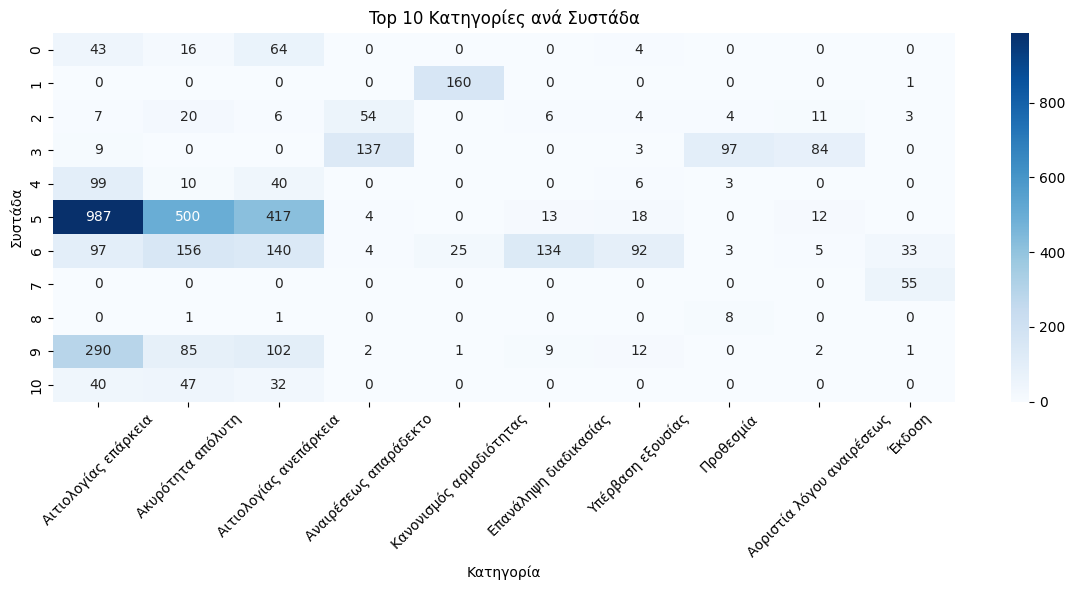

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter

data = texts_clean.copy()

cluster_category_counts = {}
cluster_tag_counts = {}

for cluster_id in range(11):
    cluster_data = data[data['cluster'] == cluster_id]

    category_counts = cluster_data['case_category'].value_counts()
    cluster_category_counts[cluster_id] = category_counts


# DataFrame for heatmap
category_df = pd.DataFrame(cluster_category_counts).fillna(0).T  # clusters x categories
top_categories = category_df.sum().nlargest(10).index
category_df = category_df[top_categories]

# heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(category_df, annot=True, fmt='g', cmap='Blues')
plt.title("Top 10 Κατηγορίες ανά Συστάδα")
plt.xlabel("Κατηγορία")
plt.ylabel("Συστάδα")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


* Το heatmap δείχνει ξεκάθαρες διαφοροποιήσεις μεταξύ των συστάδων ως προς τις κατηγορίες αποφάσεων. Η συστάδα 5 χαρακτηρίζεται κυρίως από αποφάσεις που σχετίζονται με την "Αιτιολογίας επάρκεια", ενώ η συστάδα 1 επικεντρώνεται στο "Κανονισμός αρμοδιότητας", υποδεικνύοντας ότι οι αποφάσεις αυτής της ομάδας αφορούν κυρίως αρμοδιότητες νομικών φορέων ή δικαστηρίων. Η συστάδα 9 παρουσιάζει επίσης σημαντικό πλήθος αποφάσεων με "Αιτιολογίας επάρκεια" και "Ακυρότητα απόλυτη", ενώ άλλες συστάδες, όπως η 3 ή η 6, εμφανίζουν έντονη εξειδίκευση σε πιο σπάνιες κατηγορίες όπως η "Αναιρέσεως απαράδεκτο" και "Επανάληψη διαδικασίας" αντίστοιχα. Γενικά, το διάγραμμα αποκαλύπτει ότι κάθε συστάδα αντιστοιχεί σε συγκεκριμένα πρότυπα αιτιολόγησης ή ακυρότητας, κάτι που μπορεί να βοηθήσει στη θεματική ερμηνεία των ομάδων.

### Ανάλυση και Οπτικοποίηση της Κατανομής Ετικετών ανά Συστάδα

Παρακάτω υπολογίζονται οι 10 πιο συχνές ετικέτες (tags) που εμφανίζονται σε κάθε μία από τις 11 συστάδες αποφάσεων. Για κάθε συστάδα, καταμετρώνται οι ετικέτες που εμφανίζονται και, στη συνέχεια, δημιουργείται ένας πίνακας που συγκεντρώνει τις συχνότητες των κορυφαίων ετικετών. Τέλος, αυτές οι συχνότητες απεικονίζονται με ένα heatmap, ώστε να φανεί ποιες ετικέτες είναι πιο χαρακτηριστικές για κάθε συστάδα.

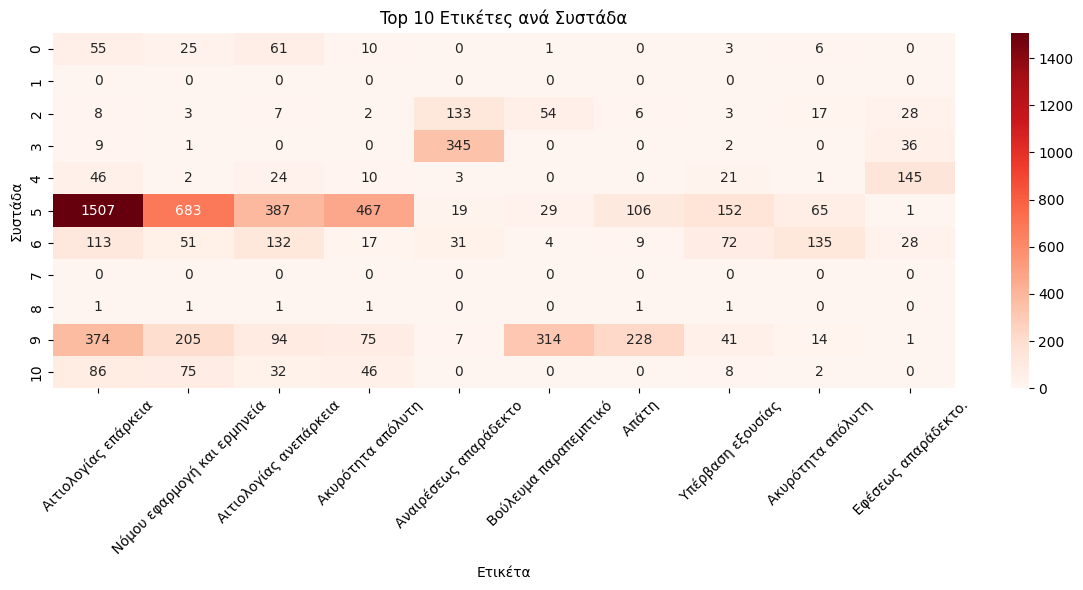

In [45]:
for cluster_id in range(11):
    cluster_data = data[data['cluster'] == cluster_id]

    # Tag distribution
    all_tags = []
    for tags in cluster_data['case_tags']:
        if isinstance(tags, str):
            all_tags.extend(tags.split(','))
    tag_counts = Counter(all_tags)
    cluster_tag_counts[cluster_id] = pd.Series(tag_counts)

all_tag_series = pd.concat(cluster_tag_counts.values())
top_tags = all_tag_series.groupby(all_tag_series.index).sum().nlargest(10).index

tag_df = pd.DataFrame({
    cluster_id: counts.reindex(top_tags, fill_value=0)
    for cluster_id, counts in cluster_tag_counts.items()
}).T

plt.figure(figsize=(12, 6))
sns.heatmap(tag_df, annot=True, fmt='g', cmap='Reds')
plt.title("Top 10 Ετικέτες ανά Συστάδα")
plt.xlabel("Ετικέτα")
plt.ylabel("Συστάδα")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Το heatmap δείχνει ότι ορισμένες συστάδες έχουν ισχυρή ταύτιση με συγκεκριμένες νομικές ετικέτες. Η συστάδα 5 κυριαρχεί σε όλες σχεδόν τις κορυφαίες ετικέτες, με ιδιαίτερη ένταση στις "Αιτιολογίας επάρκεια", "Νόμου εφαρμογή και ερμηνεία" και "Ακυρότητα απόλυτη", γεγονός που υποδηλώνει ότι συγκεντρώνει πληθώρα υποθέσεων με έντονη θεματική πολυπλοκότητα. Η συστάδα 9 επίσης ξεχωρίζει με υψηλό αριθμό ετικετών στην "Αιτιολογίας επάρκεια" και "Βούλευμα παραπεμτικό", το οποίο μπορει να σημαίνει οτι οι αποφάσεις σε αυτη την κλάση έχουν να κάνουν με το κατά πόσο οι εισαγγελικές ή δικαστικές κρίσεις είναι επαρκώς αιτιολογημένες. Ενώ, η συστάδα 3 επικεντρώνεται μόνο στην ετικέτα "Αναιρέσεως απαράδεκτο", υποδηλώνοντας ότι η απόφαση κρίθηκε απαράδεκτη. Συνολικά, το διάγραμμα δείχνει ότι οι συστάδες διαφοροποιούνται με βάση τις νομικές θεματικές που αναδεικνύονται μέσω των ετικετών.